# Tips dataset - EDA

In [1]:
# Tips EDA - same Titanic steps (with comments)
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:

# 1. Load dataset
df = sns.load_dataset('tips')   # seaborn built-in
df.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:

# 2. Basic Information & Overview
print("Shape of Dataset : ", df.shape)
print("\nData Info :")
print(df.info())


Shape of Dataset :  (244, 7)

Data Info :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB
None


In [4]:

# 3. Summary Statistics
display(df.describe(include='all'))


,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244,244,244,244,244.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
std,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000
75%,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000


In [5]:

# 4. Missing values Analysis
missing = pd.DataFrame({
    'missing_count' : df.isnull().sum(),
    'missing_percent' : (df.isnull().sum()/len(df))*100
}).sort_values(by='missing_percent', ascending=False)
print(missing)


            missing_count  missing_percent
total_bill              0              0.0
tip                     0              0.0
sex                     0              0.0
smoker                  0              0.0
day                     0              0.0
time                    0              0.0
size                    0              0.0


In [6]:

# 4a. Handling missing values
# Fill numeric with median, categorical with mode
for c in df.select_dtypes(include=['float64','int64']).columns:
    if df[c].isnull().sum() > 0:
        df[c] = df[c].fillna(df[c].median())
for c in df.select_dtypes(include=['object','category']).columns:
    if df[c].isnull().sum() > 0:
        df[c] = df[c].fillna(df[c].mode()[0])

print('Missing values after cleaning :', df.isnull().sum().sum())


Missing values after cleaning : 0


In [7]:

# Duplication & Data type check
print("Duplicate Rows : ", df.duplicated().sum())
for c in ['sex','smoker','day','time']:
    if c in df.columns:
        df[c] = df[c].astype('category')
df.info()


Duplicate Rows :  1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


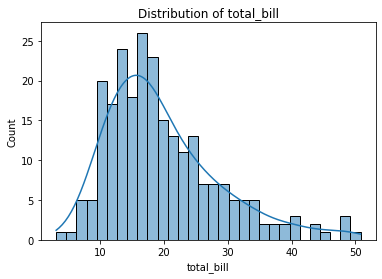

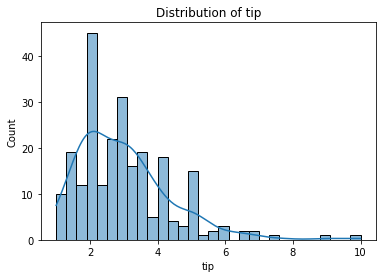

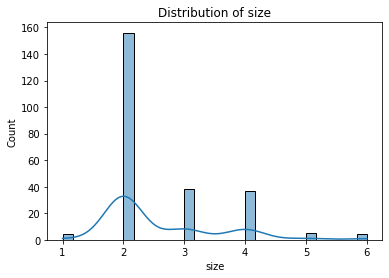

In [8]:

# Univariate Analysis - Numerical Features
num_cols = df.select_dtypes(include=['float64','int64']).columns.tolist()
display(df[num_cols].describe())

for col in num_cols:
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


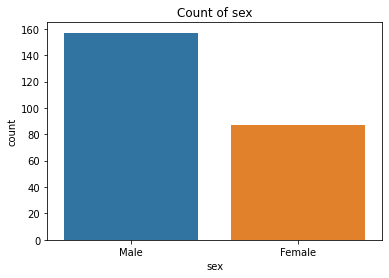

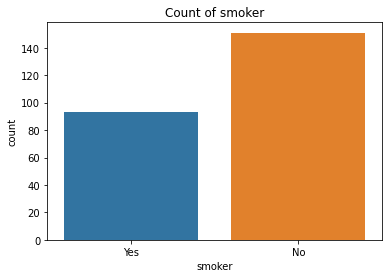

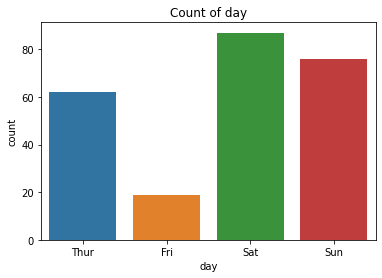

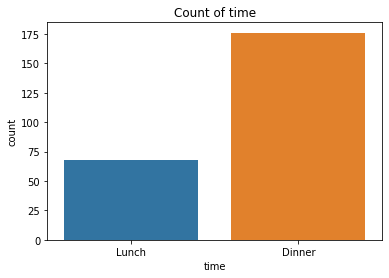

In [9]:

# Univariate - Categorical
cat_cols = df.select_dtypes(include=['category','object']).columns.tolist()
for col in cat_cols:
    sns.countplot(x=col, data=df)
    plt.title(f"Count of {col}")
    plt.show()


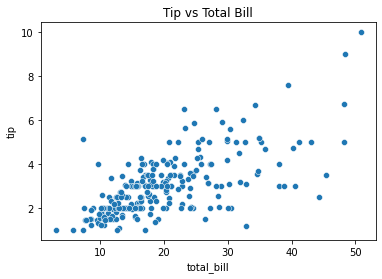

In [10]:

# Bivariate Analysis
# total_bill vs tip
if set(['total_bill','tip']).issubset(df.columns):
    sns.scatterplot(x='total_bill', y='tip', data=df)
    plt.title("Tip vs Total Bill")
    plt.show()


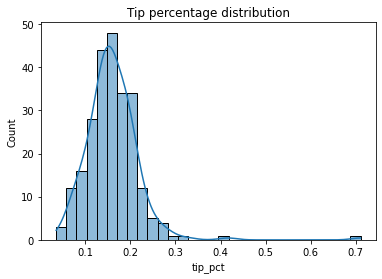

In [11]:

# tip percent feature
if set(['total_bill','tip']).issubset(df.columns):
    df['tip_pct'] = df['tip'] / df['total_bill']
    sns.histplot(df['tip_pct'], bins=30, kde=True)
    plt.title("Tip percentage distribution")
    plt.show()


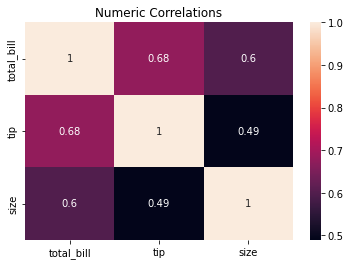

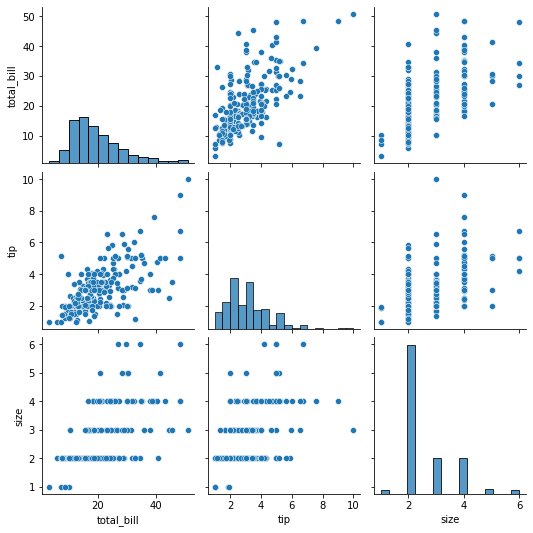

In [12]:

# Correlation and multivariate analysis
corr_cols = [c for c in num_cols if c in df.columns]
if len(corr_cols) >= 2:
    sns.heatmap(df[corr_cols].corr(), annot=True)
    plt.title("Numeric Correlations")
    plt.show()
    sns.pairplot(df[corr_cols])
    plt.show()


Number of outliers in tip :  9


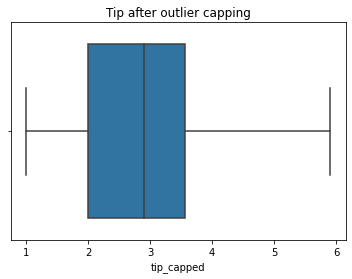

In [13]:

# Outlier detection using IQR on 'tip'
if 'tip' in df.columns:
    Q1 = df['tip'].quantile(0.25)
    Q3 = df['tip'].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df['tip'] < lower) | (df['tip'] > upper)]
    print("Number of outliers in tip : ",len(outliers))
    df['tip_capped'] = df['tip'].clip(lower, upper)
    sns.boxplot(x=df['tip_capped'])
    plt.title("Tip after outlier capping")
    plt.show()


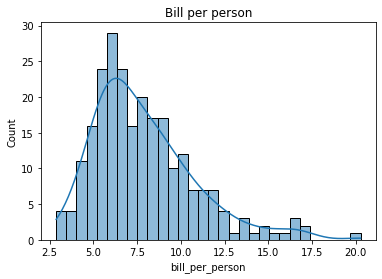

In [14]:

# Feature Engineering
# Example: bill per person (if 'size' column exists representing party size)
if 'size' in df.columns and 'total_bill' in df.columns:
    df['bill_per_person'] = df['total_bill'] / df['size'].replace(0, np.nan)
    df['bill_per_person'] = df['bill_per_person'].fillna(df['bill_per_person'].median())
    sns.histplot(df['bill_per_person'], bins=30, kde=True)
    plt.title("Bill per person")
    plt.show()


In [15]:

# Export the Cleaned data
df.to_csv("tips_cleaned.csv", index=False)
print("\n Cleaned tips data saved as tips_cleaned.csv")



 Cleaned tips data saved as tips_cleaned.csv
